In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import librosa   #for audio processing
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [20]:
import os
os.chdir("/content/drive/My Drive/speech-data/Audios/AMHARIC")
os.listdir()

['README.md', 'data', 'kaldi-script', 'lang', 'lm']

In [21]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

In [22]:
transcription=tran_loader("/content/drive/MyDrive/speech-data/Audios/AMHARIC/data/train/trsTrain.txt")

In [23]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings


In [24]:
# filenames, target,duration_of_recordings= meta_data(transcription,'valid/')

In [ ]:
# !pip install librosa
# !pip install python_speech_features

In [26]:
from itertools import cycle
sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [27]:
# !git clone https://github.com/getalp/ALFFA_PUBLIC.git

In [28]:
# !du -sh ALFFA_PUBLIC/

In [29]:
# !du -sh ALFFA_PUBLIC/ASR/*

In [30]:
# !cp -r ALFFA_PUBLIC/ASR/AMHARIC ALFFA_PUBLIC/ASR/SWAHILI drive/MyDrive/speech-data/Swahili

In [31]:
# !du -sh drive/MyDrive/speech-data/Swahili/SWAHILI/data*

### loading data with librosa

In [32]:
audios = glob('/content/drive/MyDrive/speech-data/Audios/AMHARIC/data/train/*/*.wav')

loading the first audio

In [33]:
x, sr = librosa.load(audios[0])

In [34]:
x

array([-0.12482329, -0.14234683, -0.12056861, ..., -0.1422647 ,
       -0.12749854,  0.        ], dtype=float32)

In [35]:
sr

22050

displaying one of the audios

In [36]:
ipd.Audio(x,rate=sr)

# Visualizing Audio

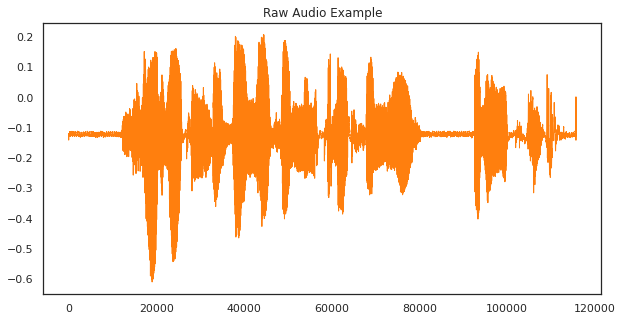

In [48]:
# ploting the discrete samples in this case the sample is the x value
pd.Series(x).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[1])

plot of the sample audio file itself, and it shows at the beginning of the audio it was silent after some time it the frequecy of audio start increasing

(array([3.4000e+01, 1.0900e+02, 4.2600e+02, 1.5850e+03, 9.7060e+03,
        5.5104e+04, 3.7873e+04, 8.2640e+03, 2.2060e+03, 4.1200e+02]),
 array([-0.6114245 , -0.52973104, -0.4480375 , -0.366344  , -0.2846505 ,
        -0.202957  , -0.12126351, -0.03957001,  0.04212349,  0.12381698,
         0.20551048], dtype=float32),
 <a list of 10 Patch objects>)

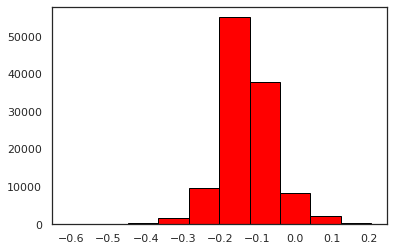

In [38]:
plt.hist(x, color='red', edgecolor='black')

This historgram plot of the audio file shows also at the beginning and end the audio goes silent 

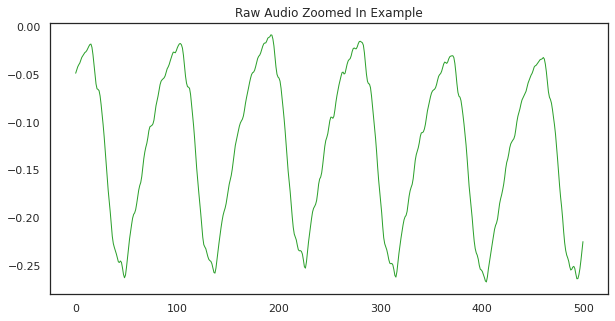

In [40]:
pd.Series(x[30000:30500]).plot(figsize=(10,5),
                               lw=1,
                               title='Raw Audio Zoomed In',
                               color = color_pal[2])
plt.show()

This plot shows the audio[0] file zoomed plot to see more clearly

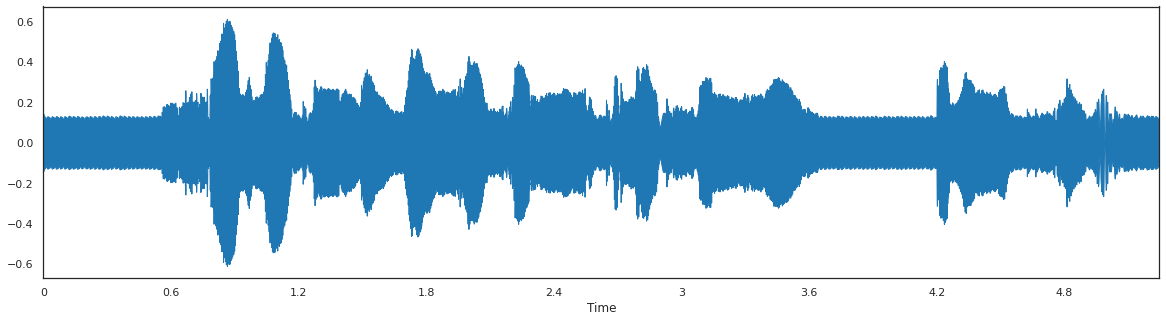

In [49]:
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

The graph indicated the sampling frequency taken over some fixed amount of time

# Spectogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

In [41]:
D = librosa.stft(x)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 227)

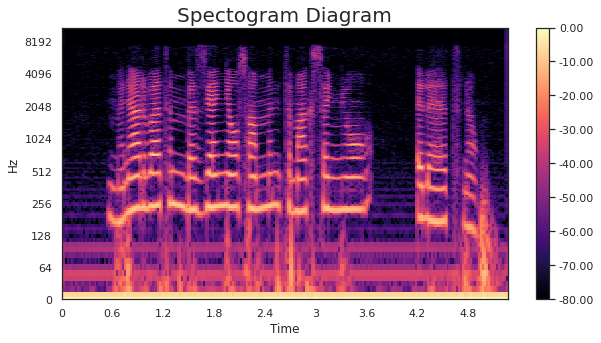

In [42]:
# plot the transformed audio data
fig,ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectogram Diagram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel spectogram